In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


3


(<matplotlib.image.AxesImage at 0x1b67f100ec8>, None)

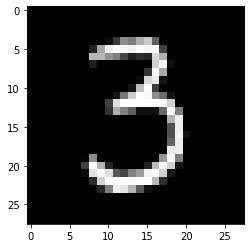

In [3]:
idx = 50
plt.imshow(x_train[idx], cmap='gray'), print(y_train[idx])

In [4]:
# hyperparameters
n_classes = 10
n_epochs = 20
batch_size = 32
steps_per_epoch = 60000 // 32
lr = 0.001

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype(np.float64) / 255.
x_test = x_test.reshape(-1, 784).astype(np.float64) / 255.

y_train = tf.one_hot(y_train, depth=n_classes)
y_test = tf.one_hot(y_test, depth=n_classes)
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)

x_train.shape: (60000, 784)
y_train.shape: (60000, 10)
x_test.shape: (10000, 784)
y_test.shape: (10000, 10)


In [6]:
w1 = tf.Variable(np.random.random(size=(784, 256))/100)
w2 = tf.Variable(np.random.random(size=(256, 256))/100)
w3 = tf.Variable(np.random.random(size=(256, n_classes))/100)

b1 = tf.Variable(np.zeros(shape=(256)))
b2 = tf.Variable(np.zeros(shape=(256)))
b3 = tf.Variable(np.zeros(shape=(n_classes)))

In [7]:
optimizer = tf.optimizers.Adam(learning_rate=lr)

In [8]:
def model(x, is_training):
    h1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
    logits = tf.matmul(h2, w3) + b3
    if not is_training:
        y_pred = tf.nn.softmax(logits)
        return y_pred
    else:
        return logits

In [9]:
def categorical_cross_entropy(logits ,y_true):
    loss = tf.nn.softmax_cross_entropy_with_logits(y_true, logits)
    return tf.reduce_mean(loss)

In [10]:
data_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train)).repeat()
data_loader = data_loader.shuffle(buffer_size=60000).batch(batch_size)
data_loader = data_loader.prefetch(1)

In [11]:
@tf.function()
def run_optimizer(x_batch, y_batch):
    with tf.GradientTape() as tape:
        logits = model(x_batch, is_training=True)
        loss = categorical_cross_entropy(logits=logits, y_true=y_batch)
    grads = tape.gradient(loss, [w1, w2, w3, b1, b2, b3])
    optimizer.apply_gradients(zip(grads,[w1, w2, w3, b1, b2, b3] ))

In [12]:
def accuracy(y_true, y_pred):
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_true, axis=1), tf.argmax(y_pred, axis=1)), dtype=tf.float64))
    return acc * 100

In [13]:
for epoch in range(n_epochs):
    for x_batch, y_batch in data_loader.take(steps_per_epoch):
        run_optimizer(x_batch, y_batch)
    
    y_pred = model(x_test, is_training=False)
    loss_test = tf.reduce_mean(tf.losses.categorical_crossentropy(y_test, y_pred))
    acc = accuracy(y_test, y_pred)
    print('epoch: ', epoch, 'loss_test:', loss_test.numpy(), 'acc: ', acc.numpy() )
    

epoch:  0 loss_test: 0.12539097586868034 acc:  96.09
epoch:  1 loss_test: 0.0962581548523161 acc:  97.19
epoch:  2 loss_test: 0.08056789214517042 acc:  97.50999999999999
epoch:  3 loss_test: 0.09167520099754663 acc:  97.55
epoch:  4 loss_test: 0.09862267787589517 acc:  97.37
epoch:  5 loss_test: 0.08270881215297514 acc:  97.76
epoch:  6 loss_test: 0.08933347817503585 acc:  97.77
epoch:  7 loss_test: 0.09460600785841204 acc:  97.75
epoch:  8 loss_test: 0.09670798507079863 acc:  97.7
epoch:  9 loss_test: 0.1064990170791687 acc:  97.78999999999999
epoch:  10 loss_test: 0.08742516390235522 acc:  98.04
epoch:  11 loss_test: 0.13119027406044734 acc:  97.34
epoch:  12 loss_test: 0.12276389997250785 acc:  97.69
epoch:  13 loss_test: 0.11352681505365195 acc:  97.74000000000001
epoch:  14 loss_test: 0.11012288036430204 acc:  97.95
epoch:  15 loss_test: 0.11254165786014136 acc:  97.87
epoch:  16 loss_test: 0.12186790839000715 acc:  97.76
epoch:  17 loss_test: 0.1510733157444815 acc:  97.54
epoch:

3


(<matplotlib.image.AxesImage at 0x1b641a4b8c8>, None)

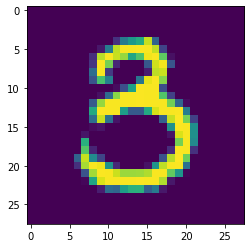

In [20]:
idx = 1150
plt.imshow(x_test[idx].reshape(28,28)), print(np.argmax(model(x_test[idx:idx+1], is_training=False)))